In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import utils
from importlib import reload
from scipy.stats import spearmanr
import consts
reload(utils)
reload(consts)

# Change seaborn style

PATH = os.getcwd()

### Data retrieval and QA

In [9]:
counts = pd.read_csv(os.path.join(PATH, 'data', 'count_tables', 'all_samples_peppro_w_mt.csv'), index_col = 0)
display('Counts', counts.head(2))
metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'all_sarah_samples.csv'))
metadata = metadata[metadata['sample'].isin(counts.columns)]
display('Metadata', metadata.tail(4))
qa_df = pd.read_csv(os.path.join(PATH, 'data', 'qa_data', 'PRO-seq_sarah_all_samples_mito_stats_summary.tsv'), sep = '\t').drop(columns = ['read1', 'read2', 'Genome', 'read_type', 'Read_type', 'protocol'])
display('QA', qa_df.head(2), qa_df.columns, len(qa_df))


'Counts'

,H1-control,H3a,D1-control,D3B,1DC,2DH,3HCa,4HHa,3-AC,4-AH,...,H2n,Control-1_S1,Control-2_S3,Control_S1,Hypoxia-02p_S4,Hypoxia-05p_S2,Hypoxia_1P_1_S2,Hypoxia_1P_2_S3,1w_S1,2G_S2
symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,20,13,30,60,190,109,19,27,33,66,...,25,0,0,67,0,0,9,0,123,272
A1CF,6,4,6,1,5,4,1,6,73,104,...,0,0,0,0,0,0,0,1,4,6


'Metadata'

,sample,descrip,treatment,index_num,cell,batch,hyp_time,oxy_conc
25,Hypoxia_1P_1_S2,HeLa cells,Hypoxy,2.0,hela,9,24,1
26,Hypoxia_1P_2_S3,HeLa cells,Hypoxy,3.0,hela,9,48,1
27,2G_S2,HeLa cells,Galactose,NaN,hela,11,0,normoxia
28,1w_S1,HeLa cells,Glucose,NaN,hela,11,0,normoxia


'QA'

,sample_name,organism,File_mb,Raw_reads,Fastq_reads,Reads_with_adapter,Uninformative_adapter_reads,Pct_uninformative_adapter_reads,Trimmed_reads_R1,Trim_loss_rate_R1,...,PBC2,Unmapped_reads,TSS_coding_score,TSS_non-coding_score,Pause_index,Plus_FRiP,Minus_FRiP,mRNA_contamination,Time,Success
0,H1-control,human,10216.22,127853096,127853096,59517222.0,845.0,0.0013,127851406,0.0,...,9833859.0,30130078,7.9,3.5,15.65,0.39,0.36,1.48,2:43:23,06-29-13:25:11
1,H3a,human,7452.42,109915500,109915500,51636817.0,171.0,0.0003,109915158,0.0,...,9463563.0,20098354,6.9,3.3,13.38,0.40,0.36,1.46,2:17:02,06-29-15:42:16


Index(['sample_name', 'organism', 'File_mb', 'Raw_reads', 'Fastq_reads',
       'Reads_with_adapter', 'Uninformative_adapter_reads',
       'Pct_uninformative_adapter_reads', 'Trimmed_reads_R1',
       'Trim_loss_rate_R1', 'Peak_adapter_insertion_size', 'Degradation_ratio',
       'Mapped_reads', 'QC_filtered_reads', 'Aligned_reads', 'Alignment_rate',
       'Total_efficiency', 'Read_depth', 'Mitochondrial_reads',
       'Maximum_read_length', 'Genome_size', 'NRF', 'PBC1', 'PBC2',
       'Unmapped_reads', 'TSS_coding_score', 'TSS_non-coding_score',
       'Pause_index', 'Plus_FRiP', 'Minus_FRiP', 'mRNA_contamination', 'Time',
       'Success'],
      dtype='object')

29

In [10]:
reload(utils)
filtered = utils.filter_by_peppr(qa_df)
display(len(filtered), len(qa_df))
filtered_samples = metadata.merge(filtered, left_on = 'sample', right_on = 'sample_name', how = 'inner')
counts_filtered = counts.loc[:, filtered_samples['sample']]
display(filtered_samples.head(2), counts_filtered.head(2))

23

29

,sample,descrip,treatment,index_num,cell,batch,hyp_time,oxy_conc,sample_name,organism,...,PBC2,Unmapped_reads,TSS_coding_score,TSS_non-coding_score,Pause_index,Plus_FRiP,Minus_FRiP,mRNA_contamination,Time,Success
0,H1-control,HeLa-1CONTROL,Control,6.0,hela,1,0,normoxia,H1-control,human,...,9833859.0,30130078,7.9,3.5,15.65,0.39,0.36,1.48,2:43:23,06-29-13:25:11
1,H3a,HeLa-3-Hypoxy,Hypoxy,1.0,hela,1,24,1,H3a,human,...,9463563.0,20098354,6.9,3.3,13.38,0.40,0.36,1.46,2:17:02,06-29-15:42:16


,H1-control,H3a,D1-control,D3B,1DC,3HCa,4HHa,3-AC,4-AH,5-BC,...,6hr-hypox,24hr-hypox,O1n,H1n,O2n,Control-1_S1,Control_S1,Hypoxia_1P_1_S2,2G_S2,1w_S1
symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,20,13,30,60,190,19,27,33,66,65,...,10,14,2,23,20,0,67,9,272,123
A1CF,6,4,6,1,5,1,6,73,104,47,...,2,5,1,0,0,0,0,0,6,4


In [11]:
hela_hypx = ['H1-control', 'H3a', '3HCa', '4HHa', '0-cont', '24hr-hypox', 'Control_S1', 'Hypoxia_1P_1_S2']
d407_hypx = ['D1-control', 'D3B', '1DC', '2DH']
u87_hypx = ['3-AC', '4-AH', '5-BC', '7-BH']
hela_diet = ['2G_S2', '1w_S1']

hela_hypx_counts = counts.loc[:, hela_hypx]
hela_diet_counts = counts.loc[:, hela_diet]
u87_hypx_counts = counts.loc[:, u87_hypx]
d407_hypx_counts = counts.loc[:, d407_hypx]

hela_hypx_samples = metadata[metadata['sample'].isin(hela_hypx)]
hela_diet_samples = metadata[metadata['sample'].isin(hela_diet)]
u87_hypx_samples = metadata[metadata['sample'].isin(u87_hypx)]
d407_hypx_samples = metadata[metadata['sample'].isin(d407_hypx)]

for n, m, c in zip(['hela_hypx', 'hela_diet', 'u87_hypx', 'd407_hypx'], [hela_hypx_samples, hela_diet_samples, u87_hypx_samples, d407_hypx_samples], [hela_hypx_counts, hela_diet_counts, u87_hypx_counts, d407_hypx_counts]):
    m.to_csv(os.path.join(PATH, 'data', 'metadata', f'{n}_metadata.csv'), index = False)
    c.to_csv(os.path.join(PATH, 'data', 'count_tables', f'{n}_counts.csv'))
display(hela_hypx_samples)
display(hela_hypx_counts)

,sample,descrip,treatment,index_num,cell,batch,hyp_time,oxy_conc
0,H1-control,HeLa-1CONTROL,Control,6.0,hela,1,0,normoxia
1,H3a,HeLa-3-Hypoxy,Hypoxy,1.0,hela,1,24,1
6,3HCa,HeLa-CONTROL,Control,4.0,hela,4,0,normoxia
7,4HHa,HeLa-Hypoxy,Hypoxy,12.0,hela,4,24,1
12,0-cont,HeLa cells,Control,3.0,hela,7,0,normoxia
15,24hr-hypox,HeLa cells,Hypoxy,7.0,hela,7,24,1
22,Control_S1,HeLa cells,Control,1.0,hela,9,0,normoxia
25,Hypoxia_1P_1_S2,HeLa cells,Hypoxy,2.0,hela,9,24,1


,H1-control,H3a,3HCa,4HHa,0-cont,24hr-hypox,Control_S1,Hypoxia_1P_1_S2
symbol,,,,,,,,
A1BG,20,13,19,27,2,14,67,9
A1CF,6,4,1,6,0,5,0,0
A2M,1227,1248,1924,2625,1282,531,1047,670
A2ML1,18,16,10,12,6,30,0,0
A3GALT2,91,27,111,74,34,43,206,121
...,...,...,...,...,...,...,...,...
TRNL2,27,56,16,15,17,3,32,0
TRNE,35,443,95,557,42,556,169,315
TRNT,1004,645,1522,1499,623,349,2440,1615


In [12]:
# Load normalized counts and prepare them
hela_peppr = pd.read_csv(os.path.join(PATH, 'data', 'norm', 'norm_pro_hela_peppr.csv'), index_col = 0)
hela = pd.read_csv(os.path.join(PATH, 'data', 'norm', 'norm_pro_hela.csv'), index_col = 0)
hela_metadata = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'hela_hypx_metadata.csv'))

In [13]:
# combine each column of hela_peppr and hela into a matrix
hela_combined = pd.concat([hela_peppr, hela], axis = 1, keys = ['peppr', 'pro'])
# drop genes with low counts
hela_combined = hela_combined.loc[hela_combined['pro'].sum(axis = 1) > 1, :]
# drop genes with low variance
hela_combined = hela_combined.loc[hela_combined['pro'].var(axis = 1) > 0.1, :]
# drop genes not in both datasets
hela_combined = hela_combined.dropna()

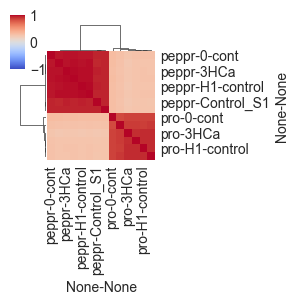

In [15]:
hela_combined.dropna().corr(method = 'spearman')
# Plot correlation between peppr and pro as a heatmap
sns.clustermap(hela_combined.corr(method = 'spearman'), annot = False, cmap = 'coolwarm', vmin = -1, vmax = 1, figsize = (3,3))

In [16]:
hela_path = os.path.join(PATH, 'data', 'norm', 'norm_pro_hela.csv')
u87_path = os.path.join(PATH, 'data', 'norm', 'norm_pro_u87.csv')

In [19]:
u87_peppr_path = os.path.join(PATH, 'data', 'norm', 'norm_pro_u87_peppr.csv')
d407_peppr_path = os.path.join(PATH, 'data', 'norm', 'norm_pro_d407_peppr.csv')
hela_peppr_path = os.path.join(PATH, 'data', 'norm', 'norm_pro_hela_peppr.csv')

u87_metadata_path = os.path.join(PATH, 'data', 'metadata', 'u87_hypx_metadata.csv')
d407_metadata_path = os.path.join(PATH, 'data', 'metadata', 'd407_hypx_metadata.csv')
hela_metadata_path = os.path.join(PATH, 'data', 'metadata', 'hela_hypx_metadata.csv')

u87_results_path = os.path.join(PATH, 'data', 'results', 'hypx_u87_peppr.csv')
d407_results_path = os.path.join(PATH, 'data', 'results', 'hypx_d407_peppr.csv')
hela_results_path = os.path.join(PATH, 'data', 'results', 'hypx_hela_peppr.csv')


In [20]:
u87_peppr, u87_metadata, u87_results = utils.combine_counts_metadata(u87_peppr_path, u87_metadata_path, u87_results_path, metadata_id_col='sample')
d407_peppr, d407_metadata, d407_results = utils.combine_counts_metadata(d407_peppr_path, d407_metadata_path, d407_results_path, metadata_id_col='sample')
hela_peppr, hela_metadata, hela_results_peppr = utils.combine_counts_metadata(hela_peppr_path, hela_metadata_path, hela_results_path, metadata_id_col='sample')


         gene
Genome       
MT         12
NUC     19307
         gene
Genome       
MT         12
NUC     19307
         gene
Genome       
MT         12
NUC     19307


In [5]:
# Load HUVEC_gro-seq peppr data
huvec_peppr_path = os.path.join(PATH, 'data', 'norm', 'norm_HUVEC_hypx_gro.csv')
huvec_metadata_path = os.path.join(PATH, 'data', 'metadata', 'HUVEC_hypx_gro.csv')
huvec_results_path = os.path.join(PATH, 'data', 'results', 'res_HUVEC_hypx_gro.csv')

huvec_peppr, huvec_metadata, huvec_results = utils.combine_counts_metadata(huvec_peppr_path, huvec_metadata_path, huvec_results_path, metadata_id_col='sample_accession')

         gene
Genome       
MT         12
NUC     22277


In [24]:
u87_peppr_sign = u87_peppr[u87_peppr['gene'].isin(u87_results[u87_results['condition.padj'] < 0.05]['gene'])]
d407_peppr_sign = d407_peppr[d407_peppr['gene'].isin(d407_results[d407_results['condition.padj'] < 0.05]['gene'])]
hela_peppr_sign = hela_peppr[hela_peppr['gene'].isin(hela_results_peppr[hela_results_peppr['condition.padj'] < 0.05]['gene'])]
huvec_peppr_sign = huvec_peppr[huvec_peppr['gene'].isin(huvec_results[huvec_results['padj'] < 0.05]['gene'])]

                 gene
Complex  Genome      
I        NUC       50
II       NUC        8
III      NUC       14
IV       NUC       36
Ribosome NUC       78
V        NUC        2
NaN      MT        12
[(('Normoxia', 'NUC'), ('Hypoxia', 'NUC')), (('Normoxia', 'MT'), ('Hypoxia', 'MT'))]


c:\Users\noam1\Desktop\Hypoxia\utils.py:499: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['z-score'] = counts.groupby([hue])[y].transform(lambda x: (x - x.mean()) / x.std())


                 gene
Complex  Genome      
I        NUC       50
II       NUC        8
III      NUC       14
IV       NUC       36
Ribosome NUC       78
V        NUC        2
NaN      MT        12
[(('Normoxia', 'NUC'), ('Hypoxia', 'NUC')), (('Normoxia', 'MT'), ('Hypoxia', 'MT'))]


c:\Users\noam1\Desktop\Hypoxia\utils.py:499: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['z-score'] = counts.groupby([hue])[y].transform(lambda x: (x - x.mean()) / x.std())


                 gene
Complex  Genome      
I        NUC       50
II       NUC        8
III      NUC       14
IV       NUC       36
Ribosome NUC       78
V        NUC        2
NaN      MT        12
[(('Normoxia', 'NUC'), ('Hypoxia', 'NUC')), (('Normoxia', 'MT'), ('Hypoxia', 'MT'))]


c:\Users\noam1\Desktop\Hypoxia\utils.py:499: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['z-score'] = counts.groupby([hue])[y].transform(lambda x: (x - x.mean()) / x.std())


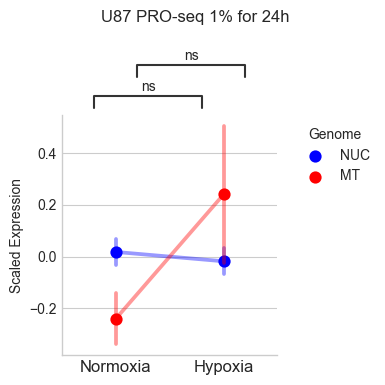

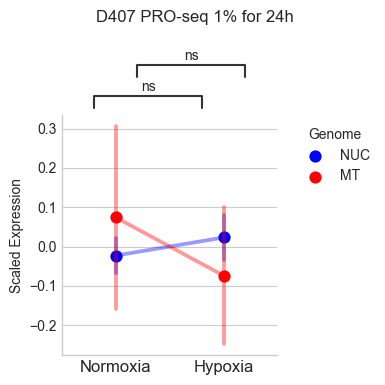

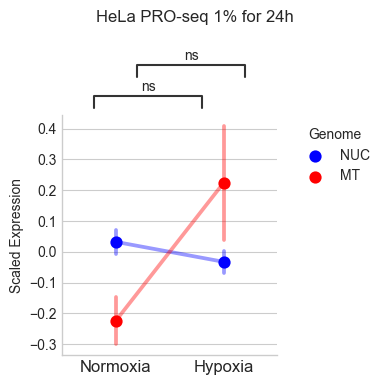

In [29]:
utils.plot_mt_vs_nuc(u87_peppr, control = 'Control', treatment = 'Hypoxy', hyp_conc = '1%', savefig = True, species = 'U87 PRO-seq')
utils.plot_mt_vs_nuc(d407_peppr, control = 'Control', treatment = 'Hypoxy', hyp_conc = '1%', savefig = True, species = 'D407 PRO-seq')
utils.plot_mt_vs_nuc(hela_peppr, control = 'Control', treatment = 'Hypoxy', hyp_conc = '1%', savefig = True, species = 'HeLa PRO-seq')


In [6]:
huvec_peppr

,gene,sample,count,cell_type,method,treatment,replicate,Description,Name,Ensembl_ID,Complex,Genome
0,A1BG,SAMN06330276,16.193749,HUVEC,GRO-seq,normoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
1,A2M,SAMN06330276,4.318333,HUVEC,GRO-seq,normoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
2,A2ML1,SAMN06330276,7.557083,HUVEC,GRO-seq,normoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
3,A3GALT2,SAMN06330276,144.664161,HUVEC,GRO-seq,normoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
4,A4GALT,SAMN06330276,57.217915,HUVEC,GRO-seq,normoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
...,...,...,...,...,...,...,...,...,...,...,...,...
290649,TRNS2,SAMN06330272,13.727942,HUVEC,GRO-seq,hypoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
290650,TRNT,SAMN06330272,89.231624,HUVEC,GRO-seq,hypoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
290651,TRNV,SAMN06330272,135.906627,HUVEC,GRO-seq,hypoxia,replicate_4,NaN,NaN,NaN,NaN,NUC
290652,TRNW,SAMN06330272,101.586772,HUVEC,GRO-seq,hypoxia,replicate_4,NaN,NaN,NaN,NaN,NUC


                 gene
Complex  Genome      
I        NUC       50
II       NUC        8
III      NUC       14
IV       NUC       32
Ribosome NUC       78
V        NUC        2
NaN      MT        12
[(('Normoxia', 'NUC'), ('Hypoxia', 'NUC')), (('Normoxia', 'MT'), ('Hypoxia', 'MT'))]


c:\Users\noam1\Desktop\Hypoxia\utils.py:499: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['z-score'] = counts.groupby([hue])[y].transform(lambda x: (x - x.mean()) / x.std())


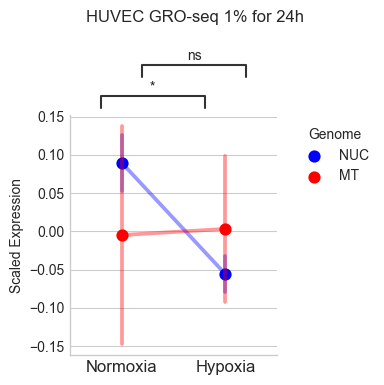

In [7]:
utils.plot_mt_vs_nuc(huvec_peppr, control = 'normoxia', treatment = 'hypoxia', hyp_conc = '1%', savefig = True, species = 'HUVEC GRO-seq')